# SPAM COMMENT DETECTION
MUHAMMAD HANIF SUYUTHI

# DESKRIPSI

## OBJEKTIF
MEMBUAT SPAM DETECTION MODEL DENGAN MENGGUNAKAN RNN

## PERMASALAHAN
- APA SAJA KATA YANG SERING MUNCUL PADA SPAM
- BAGAIMANAKAH RANCANGAN MODEL ANN YANG OPTIMAL
- BAGAIMANAKAH HASIL DARI MODEL YANG KITA BUAT


## BATASAN

 DATASET DIAMBIL DARI
 https://archive.ics.uci.edu/dataset/380/youtube+spam+collection


# AREA KERJA

## IMPOR PUSTAKA

In [110]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EDA
from wordcloud import WordCloud


from collections import Counter
from collections import Counter



import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout
from tensorflow.keras.models import Model, Sequential

from nltk.stem import WordNetLemmatizer


from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer


import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding

from tensorflow.keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings("ignore")

import pickle


from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

from keras.layers import Bidirectional

from tensorflow.keras.layers import BatchNormalization

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## MEMUAT DATA

Data yang telah dimasukan ke dalam Drive kemudian kiat muat ke dalam df. Karena data yang akan kita pakai adalah data gabungan dari 5 video maka kita menggabungkannya terlebih dahulu dengan concat

In [111]:
#Muat semua data
df1 = pd.read_csv('/content/drive/MyDrive/Hacktiv8/Youtube01-Psy.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Hacktiv8/Youtube02-KatyPerry.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Hacktiv8/Youtube03-LMFAO.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Hacktiv8/Youtube04-Eminem.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Hacktiv8/Youtube05-Shakira.csv')

In [112]:
#Gabung semua data
df = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [113]:
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


Model yang kita bangun adalah model untuk mendeteksi komentar spam sehingga kita hanya membutuhkan kolom CONTENT dan CLASS

In [114]:
# ambil kolom yang dibutuhkan
df=df[['CONTENT','CLASS']]

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [116]:

df["CLASS"].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

Karena data yang kita miliki merupakan data teks, kita akan melakukan eksplorasi data setelah kita melakukan Preprocessing Teks. Hal ini karena data teks memiliki karakter yang tidak relevan dan kata-kata yang tidak penting

## PREPROCESSING TEXT

Pada bagian ini kita akan melakukan penghapusan dan perubahan kata pada data kita  

Sebelumnya kita buat dulu list singkatan yang akan kita ubah
list ini diambil dari [link berikut](https://www.kaggle.com/code/nmaguette/up-to-date-list-of-slangs-for-text-preprocessing/notebook)

In [117]:
# list singkatan 
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [118]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Selanjutnya kita akan membuat fungsi yang akan mengubah data kita.

Pada fungsi tersebut data teks akan:
1. diubah menjadi huruf kecil
2. menghilangkan \n 
3. menghilangkan whitespace
4. menghilangkan link
5. menghilangkan simbol
6. menghilangkan stopword
7. mengubah singkatan/slang
8. melakukan steeming



In [119]:
# buat fungsi
def text_proses(teks):
  # mengubah ke lowercase
  teks = teks.lower()
  
  # menghilangkan \n
  teks = re.sub(r"\\n", " ",teks)
  
  # menghilangkan whitespace
  teks = teks.strip()

  # menghilangkan link
  teks = re.sub(r"http\S+", " ", teks)
  teks = re.sub(r"www.\S+", " ", teks)

  # menghilangkan simbol
  teks = re.sub("[^A-Za-z\s']", " ", teks)

  # tokenisasi
  tokens = word_tokenize(teks)



  # stopwords
  stop_words = set(stopwords.words('english'))
  teks = ' '.join([word for word in tokens if word not in stop_words])
  
  # mengubah singkatan
  teks = ' '.join(abbreviations.get(word, word) for word in teks.split())

  
  lemmatizer = WordNetLemmatizer()
  #teks = lemmatizer.lemmatize(teks)


  # stemming
  stemmer = PorterStemmer()
  teks = stemmer.stem(teks)
  
  
  return teks

Fungsi tersebut kemudian kita terapkan pada kolom CONTENT

In [120]:
# terapkan pada kolom CONTENT
df['CONTENT_PROCESSED'] = df['CONTENT'].apply(lambda x: text_proses(x))
df

,CONTENT,CLASS,CONTENT_PROCESSED
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check tube channel kobyoshi
1,Hey guys check out my new channel and our firs...,1,hey guys check new channel first vid us monkey...
2,just for test I have to say murdev.com,1,test say murdev com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shaking sexy ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch v vtarggvgtwq check
...,...,...,...
365,I love this song because we sing it at Camp al...,0,love song sing camp tim
366,I love this song for two reasons: 1.it is abou...,0,love song two reasons africa born beautiful so...
367,wow,0,wow
368,Shakira u are so wiredo,0,shakira you wiredo


In [121]:
# simpan untuk deployment
df.to_csv('for_eda.csv', index=False)

##EDA

Selanjutnya kita akan mengeksplorasi data yang telah diolah.
Sebelum itu kita salin dulu df ke df_eda

In [122]:
df_eda=df.copy()

In [123]:
# membagi kelas
df_spam = df.groupby('CLASS').get_group(1)
df_notspam = df.groupby('CLASS').get_group(0)

Kita akan melihat distribusi data pada kelas yang ada

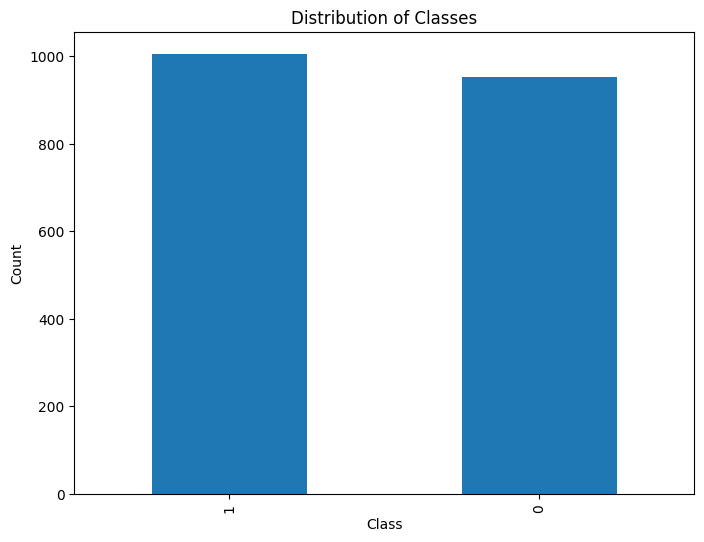

In [124]:
# Visualisasi jumlah data dalam setiap kelas
plt.figure(figsize=(8, 6))
df['CLASS'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

Dari grafik terlihat bahwa jumlah kelas 1 dan 0 tidak memeiliki selisih yang jauh

In [ ]:
Selanjutnya kita akan melihat jumlah kata pada setiap kelas

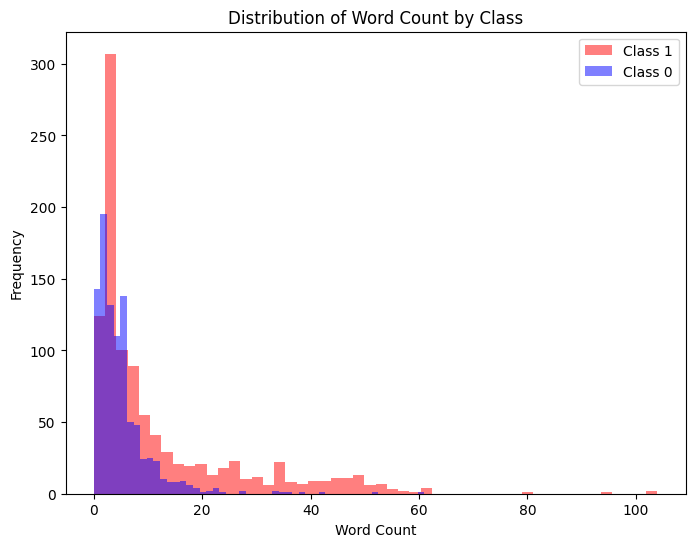

In [167]:
# Hitung jumlah kata dalam setiap teks
df_eda['Word_Count'] = df['CONTENT_PROCESSED'].apply(lambda x: len(x.split()))

# Visualisasi distribusi jumlah kata
plt.figure(figsize=(8, 6))
plt.hist(df_eda[df['CLASS'] == 1]['Word_Count'], bins=50, color='red', alpha=0.5, label='Class 1')
plt.hist(df_eda[df['CLASS'] == 0]['Word_Count'], bins=50, color='blue', alpha=0.5, label='Class 0')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count by Class')
plt.legend()
plt.show()

Selanjutnya kita akan melihat kata apa yang paling sering muncul pada tiap kelas.

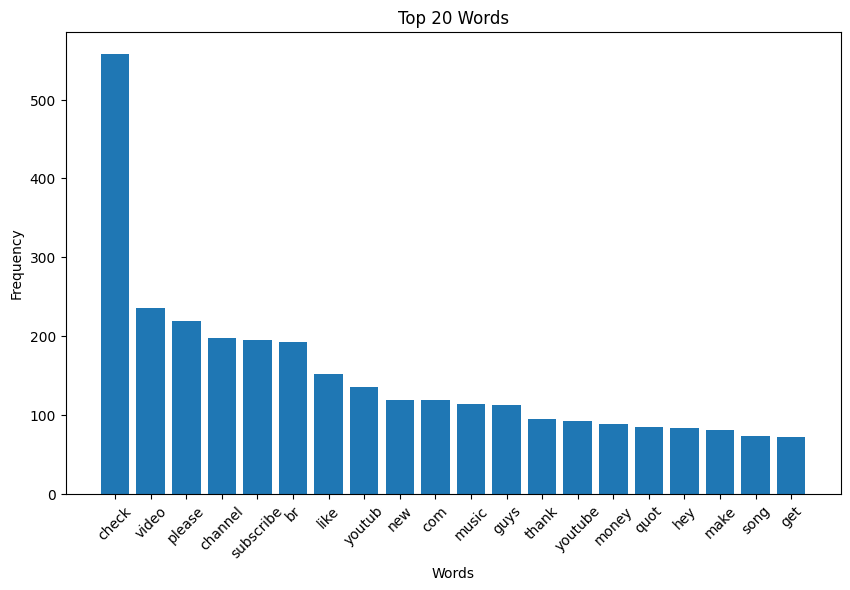

In [126]:
# Hitung frekuensi kemunculan kata dalam keseluruhan dataset
all_text = ' '.join(df_spam['CONTENT_PROCESSED'])
word_freq = Counter(all_text.split())

# Ambil 20 kata dengan frekuensi tertinggi
top_20_words = word_freq.most_common(20)

# Visualisasi frekuensi kata
words, freqs = zip(*top_20_words)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words')
plt.xticks(rotation=45)
plt.show()

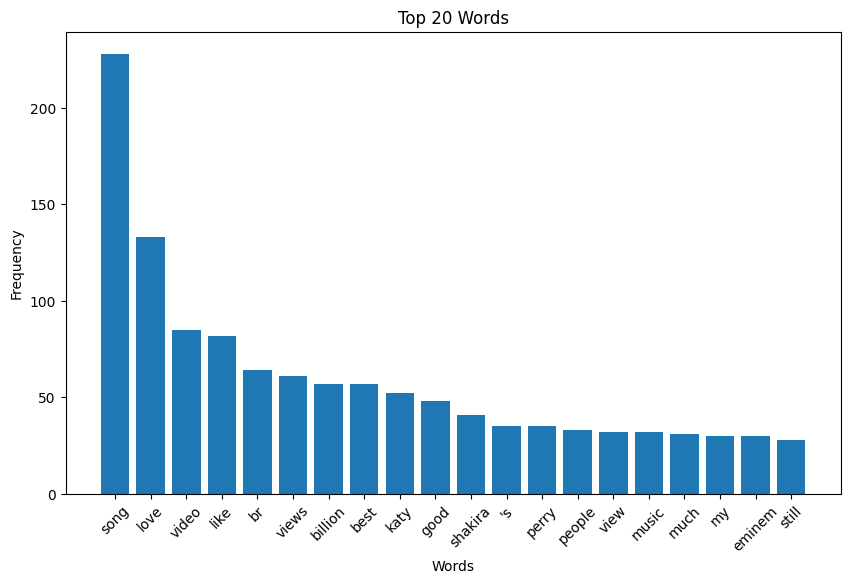

In [127]:


# Hitung frekuensi kemunculan kata dalam keseluruhan dataset
all_text = ' '.join(df_notspam['CONTENT_PROCESSED'])
word_freq = Counter(all_text.split())

# Ambil 20 kata dengan frekuensi tertinggi
top_20_words = word_freq.most_common(20)

# Visualisasi frekuensi kata
words, freqs = zip(*top_20_words)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words')
plt.xticks(rotation=45)
plt.show()

(-0.5, 799.5, 399.5, -0.5)

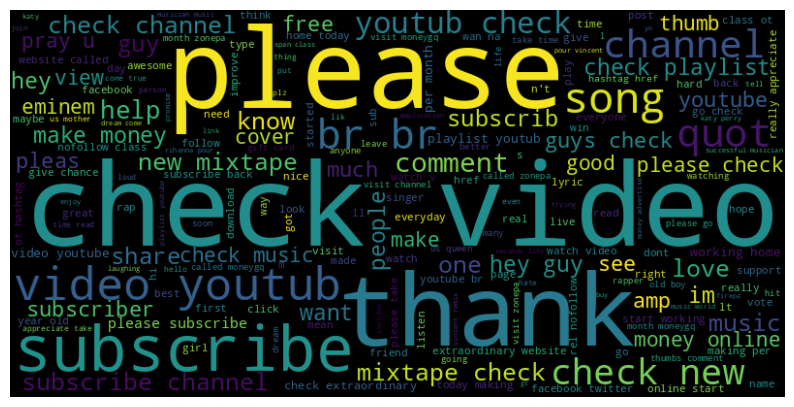

In [128]:
# Filter data hanya untuk label "spam"
spam_df = df[df['CLASS'] == 1]

# Menggabungkan semua teks dalam satu string
spam_text = ' '.join(spam_df['CONTENT_PROCESSED'])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

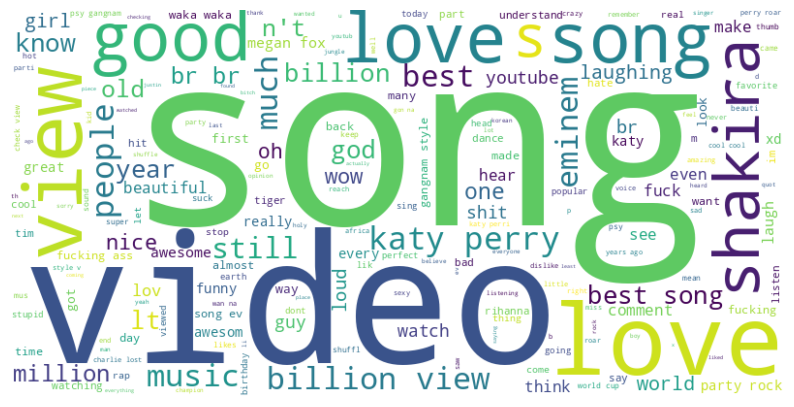

In [129]:
# Filter data hanya untuk label "spam"
notspam_df = df[df['CLASS'] == 0]

# Menggabungkan semua teks dalam satu string
notspam_text = ' '.join(notspam_df['CONTENT_PROCESSED'])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(notspam_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [130]:
#break

## FEATURE ENGINEERING

Selanjutnya kita akan melakukan Feature Engineering. Pada bagian ini kita akan mmembagi data dan mengubahnya menjadi angka

Pada model ini data fitur merupakan kolom 'CONTENT_PROCESSED' dan target adalah kolom 'CLASS'


In [131]:
# membagi data fitur dan target
X=df['CONTENT_PROCESSED']
y=df['CLASS']


Data fitur kemudian kita bagi menjadi data latih dan data tes. data latih akan kita bagi menjadai data latih dan data val

In [132]:
# membagi data latih, tes, dan val

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (1412,)
Val Size :  (250,)
Test Size :  (294,)


Kemudian kita akan mengubah teks menjadi representasi vektor numerik. Hal ini dilakukan karena ANN hanya menerima nilai numerik.

Teks akan dipecah menjadi kata-kata dan menjadi kolom pada matriks vektor. nilai pada tiap matriks tersebut adalah jumlah kemunculan kata pada baris tiap data kita. Jika tidak ada kata tersebut pada salah satu baris data maka matriks pada kolom kata dan baris tersebut tersebut akan bernilai 0. 

In [133]:
# mengubah ke vektor numerik
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<1412x2940 sparse matrix of type '<class 'numpy.int64'>'
	with 10969 stored elements in Compressed Sparse Row format>

In [134]:
# melihat jumlah vocab
jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab : ", jml_vocab)
print("Panjang maksimum kalimat : ", max_sen_len, "kata")

Jumlah vocab :  2940
Panjang maksimum kalimat :  104 kata


Terlihat bahwa jumlah vocab yang ada pada data kita adalah 2940 vocab dan maksimum kalimat pada data kita adalah 104 kata

## MODEL DEFINITION

Pada bagian ini kita akan mendefinisikan TextVectorization dan Embedding yang akaan digunakan sebagai layer awal pada model kita. TextVectorization akan mengubah membuat matriks numerik berdasarkan frekuensi kata yang muncul pada kata kita. Sedangkan Embedding akan mengkonversi representasi numerik dari teks (hasil TextVectorization) menjadi representasi vektor yang memiliki makna semantik.

In [135]:
# text_vectorization
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # Jika ingin menggunakan Sequential API
                                       )

text_vectorization.adapt(X_train)

In [136]:
# embedding

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

Selanjutnya kita akan melakukan pemodelan dengan algoritna ANN. Pada model kita akan mencari model terbaik dari Sequential dan improve dari model tersebut 

Sebelum itu kita akan membuat callback yang berfungsi untuk memberhentikan proses pelatihan ketika model sudah memilliki performa yang bagus.

In [137]:
# membuat callback 
callback_es = EarlyStopping(monitor ='val_loss', patience = 10, restore_best_weights=True)

Pada Model ini kita akan menggunakan algoritma ANN. Pada algoritma ini akan dibuat hidden layer yang memiliki neuron-neuron. Neuron-neuron tersebut akan saling terhubung dengan neuron pada layer lain. Pada layer terdapat fungsi aktivasi yang membuat nilai output pada layer akan berubah.

Untuk dataset teks kita akan menggunakan hidden layer LSTM. Hidden layer ini memiliki empat komponen utama:

- Forget Gate: Mengontrol seberapa banyak informasi yang akan dihapus dari cell state.

- Input Gate: Mengontrol seberapa banyak informasi baru yang akan ditambahkan ke cell state.

- Cell State: Tempat penyimpanan informasi jangka panjang.

- Output Gate: Mengontrol seberapa banyak informasi yang akan dioutputkan dari cell state.


Pada proses pelatihan kita memilih optimizer 'adam' untuk model biasa dan RMSprop untuk model improvement. 

RMS prop dipilih karena data kita merupakan data teks dan memiliki dimensi yang kecil

Selain itu pada model improvement kita akan menggunakan Bidirectional Layer. Layer ini menggabungkan dua set layer RNN yang berjalan dalam arah berlawanan: satu set berjalan maju dari awal ke akhir urutan data, sedangkan yang lainnya berjalan mundur dari akhir ke awal urutan data.



Karena kita tidak mau kelas not spam (0) terprediksi ke dalam kelas spam (1). Maka pada bagian evaluasi model, selain kita akan melihat nilai akurasi model, kita akan melihat nilai precision pada kelas spam (1) dan nilai recall dari kelas not spam (0).

In [138]:
#break

In [139]:
seed = 8
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## SEQUENTIAL

### Model Definition

In [140]:
# model definition

from tensorflow.keras.layers import BatchNormalization

model_lstm = Sequential()
model_lstm.add(text_vectorization)
model_lstm.add(embedding)
model_lstm.add(LSTM(32, return_sequences=True))
model_lstm.add(LSTM(16))

model_lstm.add(Dense(1, activation='sigmoid'))

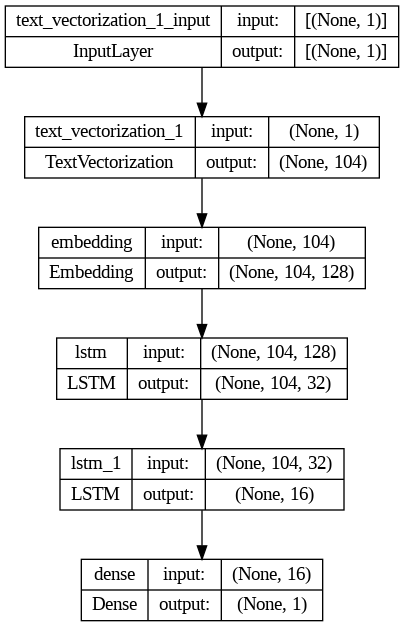

In [141]:
tf.keras.utils.plot_model(model_lstm, show_shapes=True)

### Training

In [142]:
# model training
model_lstm.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics='accuracy')

model_lstm_hist_1_32_16_RMS = model_lstm.fit(X_train,
                         y_train,
                         epochs=100,
                         batch_size=32,
                         validation_data=(X_val, y_val),
                         callbacks=[callback_es]
                         )

Epoch 1/100
45/45 [==============================] - 9s 130ms/step - loss: 0.6944 - accuracy: 0.4936 - val_loss: 0.6933 - val_accuracy: 0.4840
Epoch 2/100
45/45 [==============================] - 3s 75ms/step - loss: 0.6930 - accuracy: 0.5234 - val_loss: 0.6932 - val_accuracy: 0.4840
Epoch 3/100
45/45 [==============================] - 3s 74ms/step - loss: 0.6931 - accuracy: 0.5149 - val_loss: 0.6966 - val_accuracy: 0.4840
Epoch 4/100
45/45 [==============================] - 4s 96ms/step - loss: 0.6926 - accuracy: 0.5234 - val_loss: 0.6941 - val_accuracy: 0.4840
Epoch 5/100
45/45 [==============================] - 3s 72ms/step - loss: 0.6926 - accuracy: 0.5234 - val_loss: 0.6952 - val_accuracy: 0.4840
Epoch 6/100
45/45 [==============================] - 3s 72ms/step - loss: 0.6925 - accuracy: 0.5234 - val_loss: 0.6966 - val_accuracy: 0.4840
Epoch 7/100
45/45 [==============================] - 3s 71ms/step - loss: 0.6925 - accuracy: 0.5234 - val_loss: 0.6949 - val_accuracy: 0.4840
Epoch

### Model Evaluation

<Axes: >

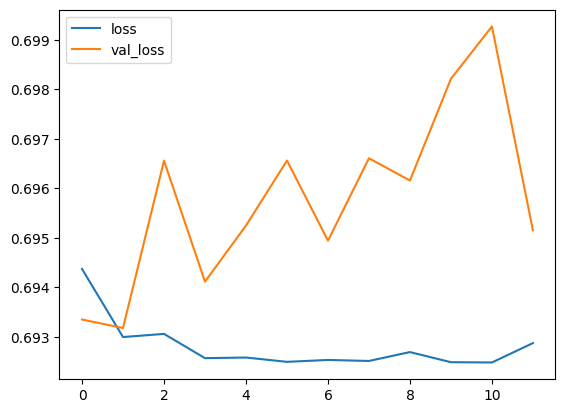

In [143]:
# melihat grafik loss dan val_loss
metrics_lstm_32_16_RMS = pd.DataFrame(model_lstm_hist_1_32_16_RMS.history)
metrics_lstm_32_16_RMS [['loss', 'val_loss']].plot()

In [144]:
metrics_lstm_32_16_RMS

,loss,accuracy,val_loss,val_accuracy
0,0.694369,0.493626,0.693347,0.484
1,0.692993,0.523371,0.693175,0.484
2,0.693056,0.514873,0.696555,0.484
3,0.692566,0.523371,0.694112,0.484
4,0.692579,0.523371,0.695244,0.484
5,0.692492,0.523371,0.696558,0.484
6,0.692530,0.523371,0.694940,0.484
7,0.692509,0.523371,0.696604,0.484
8,0.692689,0.523371,0.696155,0.484
9,0.692484,0.523371,0.698210,0.484


Dari tabel terlihat bahwa nilai loss dan val_loss tidak jauh berbeda. AKAN TETAPI nilai akurasi saat pelatihan sangatnya kurang (dibawah 90%)

10/10 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.49      0.99      0.66       145

    accuracy                           0.49       294
   macro avg       0.25      0.50      0.33       294
weighted avg       0.24      0.49      0.32       294



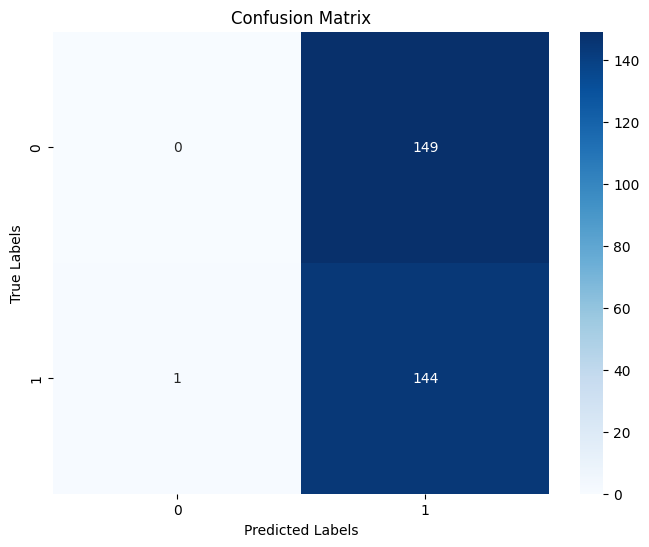

In [145]:
# prediksi data test
y_pred = model_lstm.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

# klasifikasi report
print(classification_report(y_test, y_pred))#, zero_division=1))

# Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Dari hasil prediksi terlihat bahwa model tidak bisa memprediksi kelas 1 (SPAM) dengan benar. Nilai recall pada kelas not spam juga bernilai 0 sehingga kita tidak akan menggunakan algoritma ini.

## IMPROVMENT - BIDIRECTIONAL

In [146]:
seed = 8
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

### Model Definition

In [147]:
# model definition

model_lstm_b2 = Sequential()
model_lstm_b2.add(text_vectorization)
model_lstm_b2.add(embedding)
model_lstm_b2.add(Bidirectional(LSTM(32, return_sequences=True)))
model_lstm_b2.add(Bidirectional(LSTM(16, return_sequences=True)))
model_lstm_b2.add(Bidirectional(LSTM(8)))
model_lstm_b2.add(Dense(1, activation='sigmoid'))

### Training

In [148]:
# model training

model_lstm_b2.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics='accuracy')

model_lstm_32_16_b2 = model_lstm_b2.fit(X_train,
                         y_train,
                         epochs=100,
                         batch_size=32,
                         validation_data=(X_val, y_val),
                         callbacks=[callback_es]
                         )

Epoch 1/100
45/45 [==============================] - 24s 305ms/step - loss: 0.6651 - accuracy: 0.6133 - val_loss: 0.5788 - val_accuracy: 0.7480
Epoch 2/100
45/45 [==============================] - 10s 231ms/step - loss: 0.4130 - accuracy: 0.8520 - val_loss: 0.3616 - val_accuracy: 0.8680
Epoch 3/100
45/45 [==============================] - 13s 290ms/step - loss: 0.2717 - accuracy: 0.9101 - val_loss: 0.3946 - val_accuracy: 0.8120
Epoch 4/100
45/45 [==============================] - 14s 324ms/step - loss: 0.2130 - accuracy: 0.9313 - val_loss: 0.2810 - val_accuracy: 0.9080
Epoch 5/100
45/45 [==============================] - 13s 280ms/step - loss: 0.1865 - accuracy: 0.9412 - val_loss: 0.4241 - val_accuracy: 0.8680
Epoch 6/100
45/45 [==============================] - 10s 218ms/step - loss: 0.1666 - accuracy: 0.9547 - val_loss: 0.3101 - val_accuracy: 0.8880
Epoch 7/100
45/45 [==============================] - 9s 191ms/step - loss: 0.1586 - accuracy: 0.9554 - val_loss: 0.5226 - val_accuracy: 

### Model Evaluation

<Axes: >

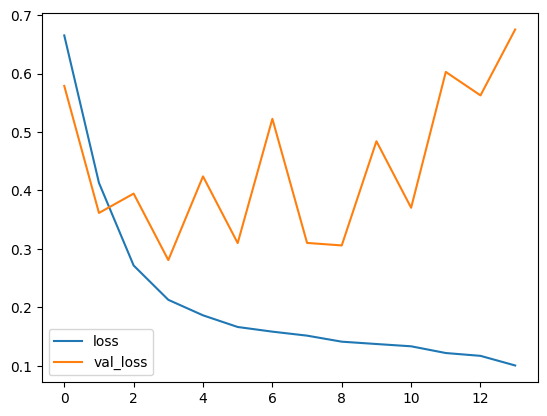

In [149]:
# melihat grafik loss dan Val_loss  
metrics_lstm_32_16_b2 = pd.DataFrame(model_lstm_32_16_b2.history)
metrics_lstm_32_16_b2 [['loss', 'val_loss']].plot()

In [150]:
metrics_lstm_32_16_b2

,loss,accuracy,val_loss,val_accuracy
0,0.665118,0.613314,0.578755,0.748
1,0.413035,0.851983,0.361568,0.868
2,0.271738,0.910057,0.394644,0.812
3,0.213018,0.931303,0.280981,0.908
4,0.186516,0.941218,0.424111,0.868
5,0.166569,0.954674,0.310053,0.888
6,0.158604,0.955382,0.522557,0.872
7,0.151775,0.958215,0.310331,0.916
8,0.141461,0.960340,0.306031,0.916
9,0.137459,0.961756,0.484195,0.880


Dari tabel terlihat bahwa nilai loss dan val_loss memiliki selisih nilai yang jauh. AKAN TETAPI nilai akurasi pada model ini lumayan tinggi ( > 80%)

10/10 [==============================] - 3s 63ms/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       149
           1       0.84      0.86      0.85       145

    accuracy                           0.85       294
   macro avg       0.85      0.85      0.85       294
weighted avg       0.85      0.85      0.85       294



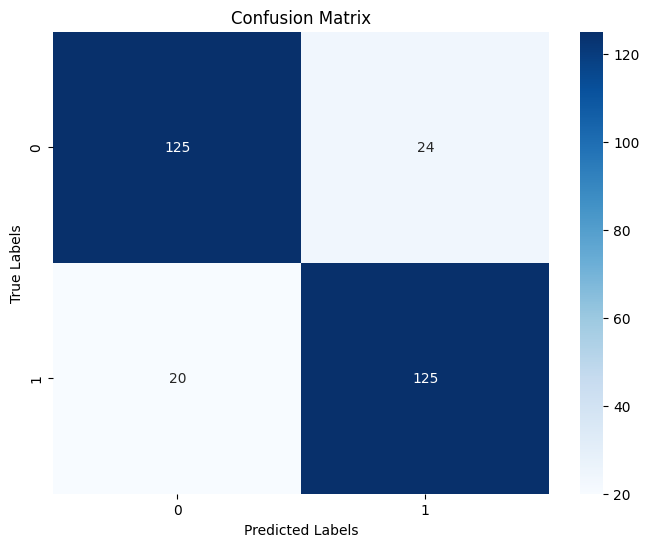

In [151]:
# prediksi dengan X test
y_pred = model_lstm_b2.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

# klasifikasi report
print(classification_report(y_test, y_pred, zero_division=1))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Dari hasil prediksi data tes terlihat bahwa nilai akurasi lumayan besar (85%). Dimana Model berhasil memprediksi benar kelas 0 (Not Spam) 125 dari 149 data dan memprediksi benar kelas 1 (spam) 125 dari 145.

Model ini juga memiliki nilai precision pada kelas Spam (1) dan nilai recall pada kelas Not Spam(0) sebesar 84%

## MODEL SAVING

Model yang kita buat kemudian kita simpan

In [152]:
with open('abbreviations.pkl', 'wb') as file_1:
  pickle.dump(abbreviations , file_1)

In [153]:
# Model Summary

model_lstm_b2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 104)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 104, 128)          376320    
                                                                 
 bidirectional (Bidirectiona  (None, 104, 64)          41216     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 104, 32)          10368     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 16)               2624      
 nal)                                                   

In [154]:
# Freeze Model

model_lstm_b2.trainable = True

In [155]:
model_lstm_b2.save('best_model')


In [156]:
import shutil
import os
from google.colab import files

#Nama direktori tempat menyimpan model
model_dir = 'best_model'

#Simpan model sebagai SavedModel TensorFlow
model_lstm_b2.save(model_dir, save_format='tf')

#Kompres direktori model menjadi file ZIP
shutil.make_archive(model_dir, 'zip', model_dir)

#Mengunduh file ZIP model
files.download(f'{model_dir}.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# KESIMPULAN

- Berdasarkan EDA terlihat bahwa:
  - Komentar Spam cenderung memiliki kata "watch", "check", "please", "channel" dan "suscribe". Sedangkan komentar Not Spam cenderung memiliki kata "song", "love", "video", "like", dan "br". Hal ini menunjukan komentar spam kebanyakan berisi promosi atau ajakan untuk mengikuti channel atau menonton vidio yang dibuat oleh user yang berkomentar tersebut. Sedangkan komentar not spam kebanyak berisi apresiasi kepada musik atau video yang dibuat oleh pemilik video.

  - Komentar Spam cenderung memiliki kata-kata yang banyak (> 60) atau sedikit pada satu komentar. 

- Pemodelan yang kita pilih adalah pemodelan yang menggunakan RMSprop dan menggunakan Bidirectional layer. Walaupun nilai antara loss dan val_loss jauh akan tetapi nilai akurasi memiliki nilai yang tinggi pada saat training. Pada data tes, model ini memiliki nilai akurasi sebesar 85%, nilai recall pada kelas not spam sebesar 84%, dan nilai precision pada kelas spam sebesar 84%  

# SARAN

- Bisa dilakukan Reguralization dan/atau Batch Norm kepada model kita. 

# COBA-COBA

## L2 Reguralization

In [157]:
from keras.layers import Bidirectional

from tensorflow.keras.layers import BatchNormalization

model_lstm_b2l2= Sequential()
model_lstm_b2l2.add(text_vectorization)
model_lstm_b2l2.add(embedding)

model_lstm_b2l2.add(Bidirectional(LSTM(32, kernel_regularizer=regularizers.l1(0.01), return_sequences=True)))

model_lstm_b2l2.add(Bidirectional(LSTM(16, kernel_regularizer=regularizers.l1(0.01), return_sequences=True)))

model_lstm_b2l2.add(Bidirectional(LSTM(8)))
model_lstm_b2l2.add(Dense(1, activation='sigmoid'))

In [158]:
model_lstm_b2l2.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics='accuracy')

model_lstm_32_16_b2l2 = model_lstm_b2l2.fit(X_train,
                         y_train,
                         epochs=100,
                         batch_size=32,
                         validation_data=(X_val, y_val),
                         callbacks=[callback_es]
                         )

Epoch 1/100
45/45 [==============================] - 24s 290ms/step - loss: 24.0478 - accuracy: 0.6062 - val_loss: 16.2371 - val_accuracy: 0.6560
Epoch 2/100
45/45 [==============================] - 11s 239ms/step - loss: 11.1112 - accuracy: 0.7890 - val_loss: 6.8737 - val_accuracy: 0.5280
Epoch 3/100
45/45 [==============================] - 11s 244ms/step - loss: 3.9983 - accuracy: 0.8768 - val_loss: 2.0922 - val_accuracy: 0.8760
Epoch 4/100
45/45 [==============================] - 7s 162ms/step - loss: 1.3167 - accuracy: 0.9207 - val_loss: 0.9269 - val_accuracy: 0.8600
Epoch 5/100
45/45 [==============================] - 8s 185ms/step - loss: 0.6150 - accuracy: 0.9207 - val_loss: 0.5961 - val_accuracy: 0.9040
Epoch 6/100
45/45 [==============================] - 8s 177ms/step - loss: 0.6153 - accuracy: 0.8746 - val_loss: 0.5666 - val_accuracy: 0.9000
Epoch 7/100
45/45 [==============================] - 10s 213ms/step - loss: 0.6257 - accuracy: 0.8718 - val_loss: 0.5353 - val_accuracy:

<Axes: >

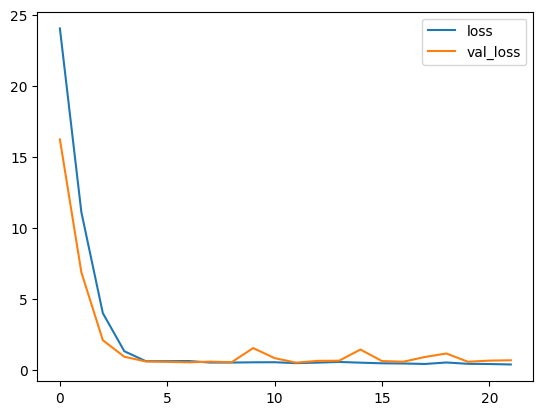

In [159]:
metrics_lstm_32_16_b2l2 = pd.DataFrame(model_lstm_32_16_b2l2.history)
metrics_lstm_32_16_b2l2 [['loss', 'val_loss']].plot()

In [160]:
metrics_lstm_32_16_b2l2

,loss,accuracy,val_loss,val_accuracy
0,24.047813,0.606232,16.237074,0.656
1,11.111197,0.788952,6.873665,0.528
2,3.998343,0.876771,2.092166,0.876
3,1.316653,0.920680,0.926901,0.860
4,0.615000,0.920680,0.596126,0.904
5,0.615296,0.874646,0.566644,0.900
6,0.625710,0.871813,0.535301,0.912
7,0.517565,0.915014,0.583123,0.888
8,0.519228,0.913598,0.542560,0.888
9,0.535088,0.899433,1.539109,0.612


10/10 [==============================] - 3s 53ms/step
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       149
           1       0.94      0.84      0.89       145

    accuracy                           0.89       294
   macro avg       0.90      0.89      0.89       294
weighted avg       0.90      0.89      0.89       294



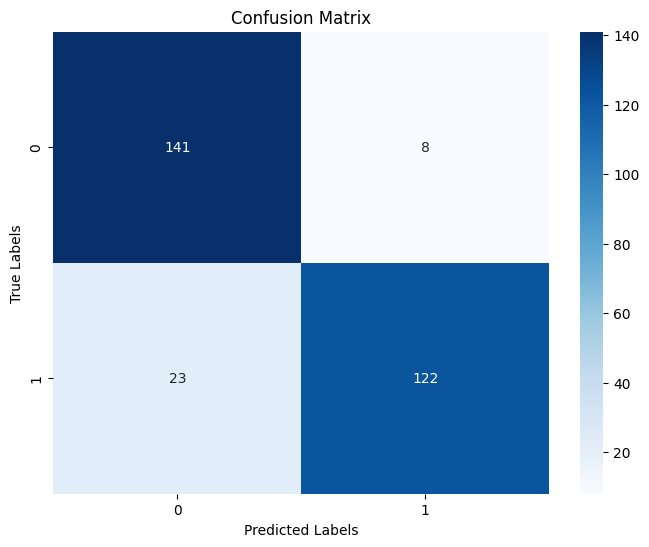

In [161]:
from sklearn.metrics import classification_report

y_pred = model_lstm_b2l2.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test, y_pred, zero_division=1))

cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Batch Norm

In [162]:
from keras.layers import Bidirectional

from tensorflow.keras.layers import BatchNormalization

model_lstm_b2bn = Sequential()
model_lstm_b2bn.add(text_vectorization)
model_lstm_b2bn.add(embedding)

model_lstm_b2bn.add(Bidirectional(LSTM(32, return_sequences=True)))
model_lstm_b2bn.add(BatchNormalization())
model_lstm_b2bn.add(Bidirectional(LSTM(16, return_sequences=True)))
model_lstm_b2bn.add(BatchNormalization())
model_lstm_b2bn.add(Bidirectional(LSTM(8)))
model_lstm_b2bn.add(BatchNormalization())
model_lstm_b2bn.add(Dense(1, activation='sigmoid'))

In [163]:
model_lstm_b2bn.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics='accuracy')

model_lstm_32_16_b2bn = model_lstm_b2bn.fit(X_train,
                         y_train,
                         epochs=100,
                         batch_size=32,
                         validation_data=(X_val, y_val),
                         callbacks=[callback_es]
                         )

Epoch 1/100
45/45 [==============================] - 19s 214ms/step - loss: 0.2219 - accuracy: 0.9164 - val_loss: 0.6603 - val_accuracy: 0.8880
Epoch 2/100
45/45 [==============================] - 8s 185ms/step - loss: 0.1304 - accuracy: 0.9575 - val_loss: 0.6152 - val_accuracy: 0.8080
Epoch 3/100
45/45 [==============================] - 7s 165ms/step - loss: 0.0934 - accuracy: 0.9738 - val_loss: 0.5574 - val_accuracy: 0.8960
Epoch 4/100
45/45 [==============================] - 8s 176ms/step - loss: 0.0810 - accuracy: 0.9823 - val_loss: 0.5105 - val_accuracy: 0.7880
Epoch 5/100
45/45 [==============================] - 8s 187ms/step - loss: 0.0560 - accuracy: 0.9823 - val_loss: 0.6698 - val_accuracy: 0.5320
Epoch 6/100
45/45 [==============================] - 7s 154ms/step - loss: 0.0495 - accuracy: 0.9858 - val_loss: 0.9253 - val_accuracy: 0.5360
Epoch 7/100
45/45 [==============================] - 8s 186ms/step - loss: 0.0412 - accuracy: 0.9887 - val_loss: 1.9003 - val_accuracy: 0.508

<Axes: >

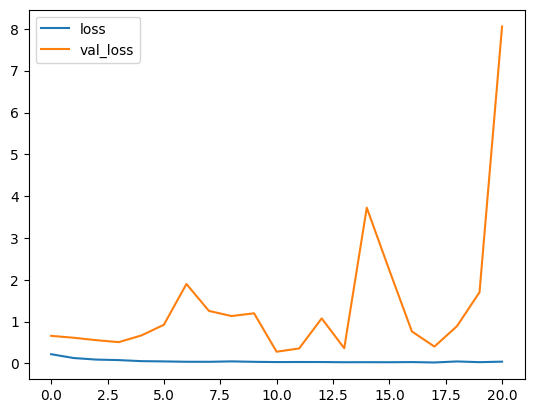

In [164]:
metrics_lstm_32_16_b2bn = pd.DataFrame(model_lstm_32_16_b2bn.history)
metrics_lstm_32_16_b2bn [['loss', 'val_loss']].plot()

In [165]:
metrics_lstm_32_16_b2bn

,loss,accuracy,val_loss,val_accuracy
0,0.221937,0.916431,0.660340,0.888
1,0.130378,0.957507,0.615206,0.808
2,0.093397,0.973796,0.557374,0.896
3,0.081044,0.982295,0.510524,0.788
4,0.055982,0.982295,0.669842,0.532
5,0.049539,0.985836,0.925303,0.536
6,0.041224,0.988669,1.900347,0.508
7,0.040176,0.990085,1.256617,0.580
8,0.050358,0.985836,1.133980,0.632
9,0.039829,0.988669,1.199710,0.688


10/10 [==============================] - 2s 30ms/step
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       149
           1       0.90      0.83      0.86       145

    accuracy                           0.87       294
   macro avg       0.87      0.87      0.87       294
weighted avg       0.87      0.87      0.87       294



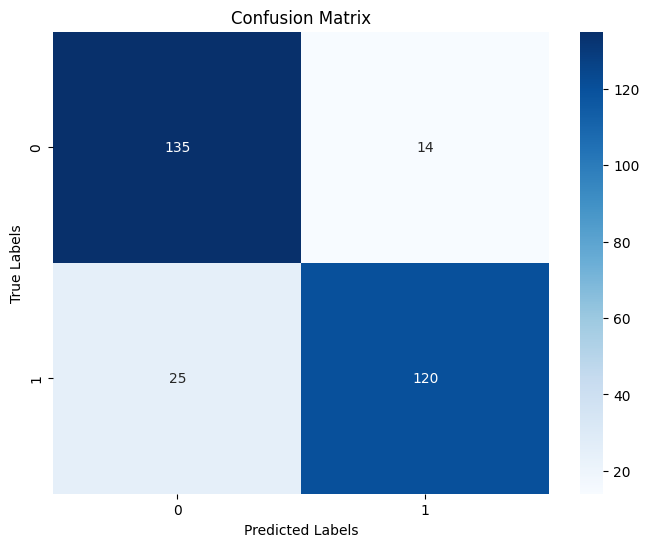

In [166]:
from sklearn.metrics import classification_report

y_pred = model_lstm_b2bn.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test, y_pred, zero_division=1))

cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
